# Question 1
Regression and out-of-distribution prediction:

a. Download the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

b. Explore, visualize, and pre-process the data as appropriate. 

c. Train, validate varying at least one hyperparameter, and test at least two types of models: 
i. Random forest

ii. Support vector regression with RBF kernel

iii. Neural network with single hidden layer (output layer should have linear activation)

d. Search the net about how to determine the importance of each variable, and find the importance in
the final models tried. Comment on whether the same variables are important for different models.

e. Test the model for red with data from white and vice versa, and comment on whether the model for
red wines is applicable to white wines and versa or not.

# Question 1 (b)

In [55]:
 # reference fpr the complete block:https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
#import libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler

df_red = pd.read_csv('winequality-red.csv') #read red wine dataset


df_red = df_red.iloc[:, 0].str.split(";", expand=True) # Splitting the single column into multiple columns
df_red = df_red.apply(pd.to_numeric, errors='coerce') #converts strings to numbers
# Renaming the columns
df_red.columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality"
]

df_red #display datafram




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [56]:
 # reference fpr the complete block:https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08

df_white = pd.read_csv('winequality-white.csv')


df_white = df_white.iloc[:, 0].str.split(";", expand=True) # Splitting the single column into multiple columns
df_white = df_white.apply(pd.to_numeric, errors='coerce') #converts string data to numbers
# Renaming the columns
df_white.columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality"
]

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [41]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np

# Extract features (first D columns)
features_w = np.array(df_white.iloc[:, :-1].astype(float))  # Extract all rows and all but the last column https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08

# Extract target (last column)
quality_w=np.array(df_white["quality"].astype(float)) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08

features_r = np.array(df_red.iloc[:, :-1].astype(float))  # Extract all rows and all but the last column https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08

# Extract target (last column)
quality_r=np.array(df_red["quality"].astype(float))  #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08

#printing features and quality
print("Features DataFrame:")
print(features_w)
print(quality_w)
print(features_r)
print(quality_r)


Features DataFrame:
[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
[6. 6. 6. ... 6. 7. 6.]
[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5. 5. 5. ... 6. 5. 6.]


In [57]:
df_white.corr() #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [43]:
df_red.corr() #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


since the correlation values are too low there are no correlated variables

# Question 1(c)

Training model by Support vector regression with RBF kernel for red wine. The hyperparameter C is varied and model is trained and corresponding accuracies are observed.

In [44]:
#ref for this block of code : https://www.geeksforgeeks.org/how-to-make-better-models-in-python-using-svm-classifier-and-rbf-kernel/ 
#importing relevant libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.svm import SVC 
import pandas as pd 
from sklearn import datasets 
import numpy as np 
from sklearn.metrics import accuracy_score
# train the model for red whine
X_train, X_test,y_train, y_test = train_test_split(df_red.drop('quality', axis=1), df_red['quality'],  test_size=0.2) #preparing trianing and test datasets
scaler = StandardScaler().fit(X_train)  #standardising the features
X_train_scaled = scaler.transform(X_train)  #standardising the features
X_test_scaled = scaler.transform(X_test) #standardising the features


svr_red = SVR(kernel='rbf', C=1, gamma=1) # Create an SVM classifier with an RBF 

  

svr_red.fit(X_train_scaled, y_train) # Fit the model to the training data 


y_pred = svr_red.predict(X_test_scaled) #predict the model
y_pred_rounded = np.round(y_pred).astype(float) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
accuracy = accuracy_score(y_test, y_pred_rounded) # Calculate the accuracy of the model on the test data 
print('Accuracy:', accuracy) #print accuracy
print(y_pred) #print predicted targer values
print(np.array(y_test)) #print y_test

Accuracy: 0.6625
[5.43183872 5.66365662 5.47891905 6.39563258 4.75502162 6.89993735
 5.90030926 5.45636198 5.3803541  5.90023111 5.33343741 5.92024506
 5.67456789 5.4748871  5.7979352  5.10042915 4.93413667 5.38704963
 5.54123653 6.86315378 5.71396824 5.44327151 5.62250065 5.7140073
 5.29085752 5.79737069 4.79403461 5.45481792 6.07015187 5.88428626
 5.24865052 6.56362961 4.94542581 5.97202478 5.88540422 5.36640334
 5.26521726 5.19119731 5.25662093 5.55797124 5.4748871  5.73830396
 5.18812503 5.099974   5.93480081 5.7223071  5.57869215 5.56698417
 5.3662962  5.90019    5.40746702 5.89993897 5.48001437 5.63104717
 6.62811882 5.62911131 5.71111863 5.4016329  5.54927625 5.09959832
 5.70186338 6.38192335 5.12553311 5.4462943  5.72899215 5.62250065
 5.90022206 5.89999841 5.65744011 6.85280933 5.84281431 6.2674907
 5.65005973 5.38996062 5.71833976 5.48247722 5.49610611 5.57623913
 5.78457539 5.43541991 5.79395117 5.89694671 5.71111863 5.90026886
 5.57224179 5.79970347 5.10013447 5.10038681 7.

In [45]:
#ref: https://www.geeksforgeeks.org/how-to-make-better-models-in-python-using-svm-classifier-and-rbf-kernel/ 



C_values = np.arange(1, 105, 5) # Define the range of C values

for i in C_values: #finding accuracies by varying the hyperparameter C
    svr_red = SVR(kernel='rbf', C=i, gamma=1)  # Create an SVM classifier with an RB
  
    
    svr_red.fit(X_train_scaled, y_train) # Fit the model to the training data 
 
    y_pred = svr_red.predict(X_test_scaled) #predict the model
    y_pred_rounded = np.round(y_pred).astype(float) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
    accuracy = accuracy_score(y_test, y_pred_rounded) # Calculate the accuracy of the model on the test data 
    print(f'Accuracy:{accuracy} and C={i}') #print accuracy and corresponding value of C

Accuracy:0.6625 and C=1
Accuracy:0.640625 and C=6
Accuracy:0.64375 and C=11
Accuracy:0.640625 and C=16
Accuracy:0.64375 and C=21
Accuracy:0.64375 and C=26
Accuracy:0.64375 and C=31
Accuracy:0.64375 and C=36
Accuracy:0.64375 and C=41
Accuracy:0.64375 and C=46
Accuracy:0.64375 and C=51
Accuracy:0.64375 and C=56
Accuracy:0.64375 and C=61
Accuracy:0.64375 and C=66
Accuracy:0.64375 and C=71
Accuracy:0.64375 and C=76
Accuracy:0.64375 and C=81
Accuracy:0.64375 and C=86
Accuracy:0.64375 and C=91
Accuracy:0.64375 and C=96
Accuracy:0.64375 and C=101


Training model by Support vector regression with RBF kernel for white whine

In [46]:
#ref for this block of code : https://www.geeksforgeeks.org/how-to-make-better-models-in-python-using-svm-classifier-and-rbf-kernel/ 
#import relevant libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.svm import SVC 
import pandas as pd 
from sklearn import datasets 
import numpy as np 
from sklearn.metrics import accuracy_score
# train the model for white whine
X_train, X_test,y_train, y_test = train_test_split(df_white.drop('quality', axis=1), df_white['quality'],  test_size=0.2) #preparing training and test datasets
scaler = StandardScaler().fit(X_train)  #standardising the features
X_train_scaled = scaler.transform(X_train)  #standardising the features
X_test_scaled = scaler.transform(X_test)  #standardising the features


svr_white = SVR(kernel='rbf', C=1, gamma=1) # Create an SVM classifier with an RBF 

  

svr_white.fit(X_train_scaled, y_train) # Fit the model to the training data 

y_pred = svr_white.predict(X_test_scaled) #predict the model
y_pred_rounded = np.round(y_pred).astype(float) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
accuracy = accuracy_score(y_test, y_pred_rounded) # Calculate the accuracy of the model on the test data 
print('Accuracy:', accuracy) #printing accuracy
print(y_pred) #print y_pred
print(np.array(y_test)) #print y_test

Accuracy: 0.6428571428571429
[5.70391985 5.85252811 5.80734659 6.04831077 6.17135422 5.28664749
 5.76987579 5.57909978 6.76162625 7.38269964 5.80708214 5.44640577
 5.09999402 6.90032969 5.71186111 5.8035505  6.87636284 5.0998258
 6.44998035 5.21102061 5.2598443  5.89963825 5.10022749 5.72678317
 5.65403408 5.49435683 5.435061   5.173984   5.84944243 5.90445351
 5.09974415 5.10003256 6.02894621 5.48604159 6.15343967 7.21180112
 5.77017672 5.56670235 5.09998403 6.10015956 6.01977283 5.92545765
 5.35125308 6.55844531 5.90443241 5.76087892 5.38350477 5.98626668
 5.86296723 5.09969645 5.10007517 5.86165315 5.86523468 5.07300636
 5.89958212 6.900099   6.10012723 6.09977273 6.13606265 5.09969532
 5.89970745 5.76927604 5.50134251 5.69539486 5.63598701 5.77442539
 6.00588327 5.89999267 5.77015636 6.48909465 5.90232382 5.97428065
 5.41365967 6.40523287 5.89986722 5.50679201 6.32809301 6.05428024
 5.13848987 5.77020006 5.92524314 5.26613136 5.66159732 5.27656137
 5.09972195 6.93613276 5.46534422 

In [47]:
#ref: https://www.geeksforgeeks.org/how-to-make-better-models-in-python-using-svm-classifier-and-rbf-kernel/ 



C_values = np.arange(1, 105, 5) # Define the range of C values

for i in C_values: #finding accuracies by varying the hyperparameter C
    svr_white = SVR(kernel='rbf', C=i, gamma=1)  # Create an SVM classifier with an RB
  
    svr_white.fit(X_train_scaled, y_train) # Fit the model to the training data 
 
    # Calculate the accuracy of the model on the test data 
    y_pred = svr_white.predict(X_test_scaled) #predict the model
    y_pred_rounded = np.round(y_pred).astype(float) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
    accuracy = accuracy_score(y_test, y_pred_rounded) # Calculate the accuracy of the model on the test data 
    print(f'Accuracy:{accuracy} and C={i}') #print accuracy and its corresponding C value

Accuracy:0.6428571428571429 and C=1
Accuracy:0.6663265306122449 and C=6
Accuracy:0.6673469387755102 and C=11
Accuracy:0.6673469387755102 and C=16
Accuracy:0.6663265306122449 and C=21
Accuracy:0.6663265306122449 and C=26
Accuracy:0.6663265306122449 and C=31
Accuracy:0.6663265306122449 and C=36
Accuracy:0.6663265306122449 and C=41
Accuracy:0.6663265306122449 and C=46
Accuracy:0.6663265306122449 and C=51
Accuracy:0.6663265306122449 and C=56
Accuracy:0.6663265306122449 and C=61
Accuracy:0.6663265306122449 and C=66
Accuracy:0.6663265306122449 and C=71
Accuracy:0.6663265306122449 and C=76
Accuracy:0.6663265306122449 and C=81
Accuracy:0.6663265306122449 and C=86
Accuracy:0.6663265306122449 and C=91
Accuracy:0.6663265306122449 and C=96
Accuracy:0.6663265306122449 and C=101


Random forest for white wine dataset

In [48]:

#reference for this block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


max_depth_values = [1,2,3,4,5,10, 20, 30, 40, 50, 60]  # Define a list of max_depth values to try
# Dictionary to store accuracy for each max_depth value
accuracy_scores = {}

# Train Random Forest classifiers with different max_depth values
for max_depth in max_depth_values:
    
    X_train, X_test,y_train, y_test = train_test_split(df_white.drop('quality', axis=1), df_white['quality'],  test_size=0.2) #prepare training and test data
    scaler = StandardScaler().fit(X_train)  #standardising the features
    X_train = scaler.transform(X_train) #standardising the features
    X_test = scaler.transform(X_test) #standardising the features

    rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42) #make rf classifier with varying hyperparameter max depth
    
    
    rf_classifier.fit(X_train, y_train) # Train the Random Forest classifier
    
    
    y_pred = rf_classifier.predict(X_test) # Predict on the testing set
    y_pred = np.round(y_pred).astype(float) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
    
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
   
    accuracy_scores[max_depth] = accuracy  # Store accuracy for this max_depth value

# Print accuracy scores
for max_depth, accuracy in accuracy_scores.items():
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy}")



Max Depth: 1, Accuracy: 0.45714285714285713
Max Depth: 2, Accuracy: 0.5163265306122449
Max Depth: 3, Accuracy: 0.5061224489795918
Max Depth: 4, Accuracy: 0.5316326530612245
Max Depth: 5, Accuracy: 0.5469387755102041
Max Depth: 10, Accuracy: 0.6142857142857143
Max Depth: 20, Accuracy: 0.6683673469387755
Max Depth: 30, Accuracy: 0.6602040816326531
Max Depth: 40, Accuracy: 0.6846938775510204
Max Depth: 50, Accuracy: 0.6673469387755102
Max Depth: 60, Accuracy: 0.673469387755102


Training for red wine dataset 

In [49]:

#reference for this block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


max_depth_values = [1,2,3,4,5,10, 20, 30, 40, 50, 60]  # Define a list of max_depth values to try
# Dictionary to store accuracy for each max_depth value
accuracy_scores = {}

# Train Random Forest classifiers with different max_depth values
for max_depth in max_depth_values:
    
    X_train, X_test,y_train, y_test = train_test_split(df_red.drop('quality', axis=1), df_red['quality'],  test_size=0.2) #prepare training and test data
    scaler = StandardScaler().fit(X_train)  #standardising the features
    X_train = scaler.transform(X_train) #standardising the features
    X_test = scaler.transform(X_test) #standardising the features

    rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42) #make rf classifier with varying hyperparameter max depth
    
    
    rf_classifier.fit(X_train, y_train) # Train the Random Forest classifier
    
    
    y_pred = rf_classifier.predict(X_test) # Predict on the testing set
    y_pred = np.round(y_pred).astype(float) #https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
    
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
   
    accuracy_scores[max_depth] = accuracy  # Store accuracy for this max_depth value

# Print accuracy scores
for max_depth, accuracy in accuracy_scores.items():
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy}")



Max Depth: 1, Accuracy: 0.5375
Max Depth: 2, Accuracy: 0.578125
Max Depth: 3, Accuracy: 0.565625
Max Depth: 4, Accuracy: 0.64375
Max Depth: 5, Accuracy: 0.6
Max Depth: 10, Accuracy: 0.659375
Max Depth: 20, Accuracy: 0.70625
Max Depth: 30, Accuracy: 0.69375
Max Depth: 40, Accuracy: 0.709375
Max Depth: 50, Accuracy: 0.70625
Max Depth: 60, Accuracy: 0.70625


# Question 1(d)

Permutation importance can be used to obtain importance of each features. In this method the values in column(i.e of a feature) are permuted and the inaccuracy is observed.

In [50]:

#reference for initial block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
#importing relevant libraries
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import numpy as np



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_red.drop('quality', axis=1), df_red['quality'], test_size=0.2)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train RF model
rf_classifier_red = RandomForestRegressor(n_estimators=100, max_depth=40, random_state=42) #make rf classifier with varying hyperparameter max depth
    
    
rf_classifier_red.fit(X_train, y_train) # Train the Random Forest classifier

# Predict and round the predictions
y_pred = rf_classifier_red.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

#ref for the next lines https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
perm = permutation_importance(rf_classifier_red, X_test, y_test, random_state=1)
importances = perm.importances_mean
indices = np.argsort(importances)[::-1]

# Print importance of each feature
for i, idx in enumerate(indices):
    print(f"Feature {idx}: Importance = {importances[idx]}")


Accuracy: 0.678125
Feature 10: Importance = 0.35051494042163156
Feature 9: Importance = 0.2051538955087076
Feature 1: Importance = 0.1047934922089826
Feature 6: Importance = 0.06500724106324471
Feature 5: Importance = 0.025066636113657205
Feature 3: Importance = 0.024953620531622357
Feature 4: Importance = 0.020342071494042147
Feature 2: Importance = 0.02011879010082489
Feature 0: Importance = 0.01985921173235563
Feature 7: Importance = 0.013104399633363873
Feature 8: Importance = 0.012214390467461067


In [51]:

#reference for initial block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
#importing relevant libraries
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import numpy as np



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_red.drop('quality', axis=1), df_red['quality'], test_size=0.2)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train svr model
svr_red = SVR(kernel='rbf', C=101, gamma=1)
svr_red.fit(X_train, y_train)

# Predict and round the predictions
y_pred = svr_red.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

#ref for the next lines https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
perm = permutation_importance(svr_red, X_test, y_test, random_state=1)
importances = perm.importances_mean
indices = np.argsort(importances)[::-1]

# Print importance of each feature
for i, idx in enumerate(indices):
    print(f"Feature {idx}: Importance = {importances[idx]}")


Accuracy: 0.6
Feature 10: Importance = 0.18553535292019013
Feature 1: Importance = 0.18332571133631811
Feature 9: Importance = 0.14181102573919774
Feature 8: Importance = 0.13787255505192167
Feature 2: Importance = 0.13359154364068954
Feature 0: Importance = 0.11907828860181395
Feature 7: Importance = 0.10356696798967531
Feature 6: Importance = 0.09854309955029868
Feature 5: Importance = 0.0767800014912716
Feature 3: Importance = 0.06242033407951801
Feature 4: Importance = 0.05206980864414046


Similar analysis for white wine

In [52]:

#reference for initial block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
#importing relevant libraries
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import numpy as np



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_white.drop('quality', axis=1), df_white['quality'], test_size=0.2)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train RF model
rf_classifier_white = RandomForestRegressor(n_estimators=100, max_depth=60, random_state=42) #make rf classifier with varying hyperparameter max depth
    
    
rf_classifier_white.fit(X_train, y_train) # Train the Random Forest classifier

# Predict and round the predictions
y_pred = rf_classifier_white.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

#ref for the next lines https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
perm = permutation_importance(rf_classifier_white, X_test, y_test, random_state=1)
importances = perm.importances_mean
indices = np.argsort(importances)[::-1]

# Print importance of each feature
for i, idx in enumerate(indices):
    print(f"Feature {idx}: Importance = {importances[idx]}")


Accuracy: 0.6673469387755102
Feature 10: Importance = 0.45700992183304506
Feature 1: Importance = 0.21124948637879487
Feature 5: Importance = 0.1338094290961408
Feature 8: Importance = 0.05537008121672606
Feature 3: Importance = 0.04838458513170374
Feature 4: Importance = 0.046314325304479896
Feature 6: Importance = 0.044742177403849406
Feature 9: Importance = 0.03622700001988988
Feature 7: Importance = 0.03306635691601865
Feature 0: Importance = 0.0328525944931745
Feature 2: Importance = 0.02869401223886343


In [53]:

#reference for initial block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
#importing relevant libraries
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import numpy as np



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_white.drop('quality', axis=1), df_white['quality'], test_size=0.2)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train svr model
svr_white = SVR(kernel='rbf', C=101, gamma=1)
svr_white.fit(X_train, y_train)

# Predict and round the predictions
y_pred = svr_white.predict(X_test)
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

#ref for the next lines https://chat.openai.com/share/11d392a3-f1dd-4774-9c0d-cbf4b8498e08
perm = permutation_importance(svr_white, X_test, y_test, random_state=1)
importances = perm.importances_mean
indices = np.argsort(importances)[::-1]

# Print importance of each feature
for i, idx in enumerate(indices):
    print(f"Feature {idx}: Importance = {importances[idx]}")


Accuracy: 0.673469387755102
Feature 10: Importance = 0.26486386943533724
Feature 7: Importance = 0.23394111743586707
Feature 6: Importance = 0.21478553754808588
Feature 8: Importance = 0.1748387704734669
Feature 3: Importance = 0.17448908600853968
Feature 1: Importance = 0.16618691367961339
Feature 5: Importance = 0.1634452394699197
Feature 0: Importance = 0.15800449904044542
Feature 9: Importance = 0.14694916092305627
Feature 2: Importance = 0.13684535966705574
Feature 4: Importance = 0.11355102556997643


So same variables may not be always important for different models as in this case the features had different relative importance in different models

# Question 1(e)

Cross training the datas with support vector regression models

In [82]:
#ref: same as used in previous blocks of codes
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_white.drop('quality', axis=1), df_white['quality'], test_size=0.2) #obtain train and test data for white wine

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



y_pred = svr_red.predict(X_test_scaled) #use the model svr_red i.e of red whine 
y_pred_rounded = np.round(y_pred).astype(float) # Predict and round the predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

Accuracy: 0.47244897959183674


In [83]:
#ref: same as used in previous blocks of codes
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_red.drop('quality', axis=1), df_red['quality'], test_size=0.2) #obtain train and test data for red wine

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Predict and round the predictions
y_pred = svr_white.predict(X_test_scaled) #use the model svr_white i.e of white whine 
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

Accuracy: 0.425


Cross training the datas with random forest models

In [87]:
#ref: same as used in previous blocks of codes
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_white.drop('quality', axis=1), df_white['quality'], test_size=0.2) #obtain train and test data for white wine

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Predict and round the predictions
y_pred = rf_classifier_red.predict(X_test_scaled) #use the model of red whine 
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

Accuracy: 0.4479591836734694


In [88]:
#ref: same as used in previous blocks of codes
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_red.drop('quality', axis=1), df_red['quality'], test_size=0.2) #obtain train and test data for red wine

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Predict and round the predictions
y_pred = rf_classifier_white.predict(X_test_scaled) #use the model svr_white i.e of white whine 
y_pred_rounded = np.round(y_pred).astype(float)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print('Accuracy:', accuracy)

Accuracy: 0.50625


The accuracies are quite poor in these cases so the model for one wine is not applicable on other

# Question 2
a. Download the data to predict Down syndrome in mice from
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#. The prediction problem is to
either predict the genotype (binary) using the gene expression variables from DYRK1A_N to CaNA_N.

b. Explore, visualize, and pre-process the data as appropriate, including developing a strategy to deal
with missing variables. You can choose to impute the variable. The recommended way is to use
multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

c. Train, validate varying at least one hyperparameter, and test at least two types of models:

i. Random forest

ii. Support vector classification using RBF kernel

iii. Neural network with single hidden layer (output layer should be have softmax activation)

d. See if removing some features systematically will improve your models using recursive feature
elimination https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). 

# Question 2(b)

In [27]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
import pandas as pd  
df1 = pd.read_excel('Data_Cortex_Nuclear.xls') #read  dataset
df1

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [28]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer #https://stackoverflow.com/questions/55846680/can-not-import-iterativeimputer-from-sklearn-impute
from sklearn.impute import IterativeImputer #https://stackoverflow.com/questions/55846680/can-not-import-iterativeimputer-from-sklearn-impute


# Extract features and target vector
features = df1.iloc[:, 1:78]  # Extracting columns indexed 1 to 77 as features 


# Perform imputation #ref for next lines https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
imputer = IterativeImputer(max_iter=10, random_state=0) #https://scikit-learn.org/stable/modules/impute.html
imputed_features = imputer.fit_transform(features) #https://scikit-learn.org/stable/modules/impute.html


imputed_features_df = pd.DataFrame(imputed_features, columns=features.columns)  # Convert imputed features back to DataFrame


imputed_features_df

C:\Users\mrudal\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.108588,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.110232,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.110037,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118320,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.117445,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.155506,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.149545,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.170529,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.175565,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [29]:
#REF FOR LABEL ENCODER  #https://www.kaggle.com/code/pranathichunduru/svm-for-multiclass-classification
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
target_column = df1.iloc[:, -4]  # genotype is the target column
encoder.fit(target_column) 
target_column = encoder.transform(target_column)
target_column

array([0, 0, 0, ..., 1, 1, 1])

# Question 2(c)

In [30]:
#same references as used in earlier codes
#import relevant libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.svm import SVC 
import pandas as pd 
from sklearn import datasets 
import numpy as np 
from sklearn.metrics import accuracy_score

C_values = np.arange(1, 105, 5) # Define the range of C values
for i in C_values: #finding accuracies by varying the hyperparameter C
    X_train, X_test, y_train, y_test = train_test_split(imputed_features_df, target_column, test_size=0.2) #split data into training and test

    svc_classifier = SVC(kernel='rbf', C=i, gamma=1,decision_function_shape='ovr') #create SVM classifier with rbf kernel 
    svc_classifier.fit(X_train, y_train) # Fit the model to the training data 
 
    # Calculate the accuracy of the model on the test data 
    y_pred = svc_classifier.predict(X_test) #predict the model
    accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model on the test data 
    print(f'Accuracy:{accuracy} and C={i}') #print accuracy and its corresponding C value


Accuracy:0.9861111111111112 and C=1
Accuracy:0.9907407407407407 and C=6
Accuracy:0.9953703703703703 and C=11
Accuracy:0.9907407407407407 and C=16
Accuracy:0.9953703703703703 and C=21
Accuracy:0.9861111111111112 and C=26
Accuracy:0.9861111111111112 and C=31
Accuracy:0.9953703703703703 and C=36
Accuracy:0.9907407407407407 and C=41
Accuracy:0.9907407407407407 and C=46
Accuracy:0.9907407407407407 and C=51
Accuracy:0.9861111111111112 and C=56
Accuracy:1.0 and C=61
Accuracy:0.9907407407407407 and C=66
Accuracy:0.9953703703703703 and C=71
Accuracy:0.9907407407407407 and C=76
Accuracy:0.9953703703703703 and C=81
Accuracy:0.9722222222222222 and C=86
Accuracy:0.9953703703703703 and C=91
Accuracy:1.0 and C=96
Accuracy:0.9953703703703703 and C=101


In [31]:
#reference for this block of code:https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a list of max_depth values to try
max_depth_values = [1,2,3,4,5,10, 20, 30, 40, 50, 60]  # You can adjust this list as needed

# Dictionary to store accuracy for each max_depth value
accuracy_scores = {}

# Train Random Forest classifiers with different max_depth values
for max_depth in max_depth_values:
    
    X_train, X_test, y_train, y_test = train_test_split(imputed_features_df, target_column, test_size=0.2) # Instantiate Random Forest classifier with the current max_depth

    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42) #make rf classifier with varying hyperparameter max depth
    
    
    rf_classifier.fit(X_train, y_train) # Train the Random Forest classifier
    
    
    y_pred = rf_classifier.predict(X_test) # Predict on the testing set
    
    
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    
   
    accuracy_scores[max_depth] = accuracy  # Store accuracy for this max_depth value

# Print accuracy scores
for max_depth, accuracy in accuracy_scores.items():
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy}")


Max Depth: 1, Accuracy: 0.7546296296296297
Max Depth: 2, Accuracy: 0.8472222222222222
Max Depth: 3, Accuracy: 0.8981481481481481
Max Depth: 4, Accuracy: 0.9629629629629629
Max Depth: 5, Accuracy: 0.9490740740740741
Max Depth: 10, Accuracy: 1.0
Max Depth: 20, Accuracy: 0.9953703703703703
Max Depth: 30, Accuracy: 0.9953703703703703
Max Depth: 40, Accuracy: 0.9953703703703703
Max Depth: 50, Accuracy: 0.9953703703703703
Max Depth: 60, Accuracy: 0.9768518518518519


# Question 2(d)

In [33]:
#ref for this block :https://www.geeksforgeeks.org/recursive-feature-elimination-with-cross-validation-in-scikit-learn/
from sklearn.datasets import load_iris 
from sklearn.feature_selection import RFECV 
from sklearn.tree import DecisionTreeClassifier 
#REF FOR LABEL ENCODER  #https://www.kaggle.com/code/pranathichunduru/svm-for-multiclass-classification 
encoder = preprocessing.LabelEncoder()
target_column = df1.iloc[:, -1]  # last column is the target column(8 class classification)
encoder.fit(target_column) 
target_column = encoder.transform(target_column)
# Create a decision tree classifier 
estimator = RandomForestClassifier()  
  
# Use RFE with cross-validation to  
# find the optimal number of features 
selector = RFECV(estimator, cv=5) 
selector = selector.fit(imputed_features_df, target_column) 
  
# Print the optimal number of features 
print("Optimal number of features: %d" % selector.n_features_) 
  
# Print the selected features 
print("Selected features: %s" % selector.support_) 

Optimal number of features: 31
Selected features: [ True  True False False False False False  True False False  True False
  True False False  True False  True False  True  True False False False
 False False False False False False  True False  True  True  True  True
 False False  True  True  True False  True False False  True  True False
  True  True  True False False  True False  True  True False False False
  True False False False False  True False False False False  True False
 False  True False False  True]


In [34]:
selector.support_

array([ True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True])

In [35]:
#same references as earlier
#training for svc
X_rfe = imputed_features_df.iloc[:, selector.support_] # Select only the relevant features  https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c

for i in C_values:
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, target_column, test_size=0.2) #split data into training and test
    svc_classifier = SVC(kernel='rbf', C=i, gamma=1,decision_function_shape='ovr') #create SVM classifier with rbf kernel 
    svc_classifier.fit(X_train, y_train) # Fit the model to the training data 
    # Predict on the testing set
    y_pred = svc_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy} and C={i}')

Accuracy: 0.9722222222222222 and C=1
Accuracy: 1.0 and C=6
Accuracy: 1.0 and C=11
Accuracy: 1.0 and C=16
Accuracy: 1.0 and C=21
Accuracy: 1.0 and C=26
Accuracy: 1.0 and C=31
Accuracy: 1.0 and C=36
Accuracy: 1.0 and C=41
Accuracy: 1.0 and C=46
Accuracy: 1.0 and C=51
Accuracy: 0.9907407407407407 and C=56
Accuracy: 1.0 and C=61
Accuracy: 1.0 and C=66
Accuracy: 0.9953703703703703 and C=71
Accuracy: 1.0 and C=76
Accuracy: 1.0 and C=81
Accuracy: 1.0 and C=86
Accuracy: 0.9907407407407407 and C=91
Accuracy: 1.0 and C=96
Accuracy: 1.0 and C=101


In [36]:
#same references as earlier
#training for random forest
X_rfe = imputed_features_df.iloc[:, selector.support_] # Select only the relevant features # Select only the relevant features  https://chat.openai.com/share/b90a2974-60e4-4d89-b4a4-d08a90d12a9c


for max_depth in max_depth_values:
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, target_column, test_size=0.2) #split data into training and test
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42) #make rf classifier with varying hyperparameter max depth
    rf_classifier.fit(X_train, y_train) # Train the Random Forest classifier
    y_pred = rf_classifier.predict(X_test) # Predict on the testing set
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy} and max_depth={max_depth}')

Accuracy: 0.3425925925925926 and max_depth=1
Accuracy: 0.6481481481481481 and max_depth=2
Accuracy: 0.6990740740740741 and max_depth=3
Accuracy: 0.7638888888888888 and max_depth=4
Accuracy: 0.8935185185185185 and max_depth=5
Accuracy: 0.9953703703703703 and max_depth=10
Accuracy: 0.9907407407407407 and max_depth=20
Accuracy: 0.9814814814814815 and max_depth=30
Accuracy: 0.9953703703703703 and max_depth=40
Accuracy: 0.9814814814814815 and max_depth=50
Accuracy: 0.9953703703703703 and max_depth=60


High accuracy is obtained by using only the optimal features

# Question 3
Practice using pre-trained neural networks to extract domain-specific features for new tasks.
a. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore“finetuning the ConvNet”. Test this code out to see if it runs properly in your environment after
eliminating code blocks that you do not need.

b. Write a function that outputs ResNet18 features for a given input image. Extract features for training
images (in image_datasets['train']). You should get an Nx512 dimensional array.

c. Compare RBF kernel SVM (do grid search on kernel width and regularization) and random forest (do
grid search on max depth and number of trees). Test the final model on test data and show the
results -- accuracy and F1 score.

# Question 3(a)

In [1]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

C:\Users\mrudal\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\mrudal\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

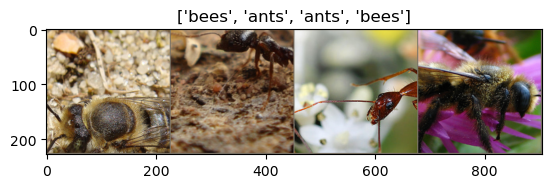

In [3]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [4]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [5]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [6]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [7]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6007 Acc: 0.6598
val Loss: 0.4218 Acc: 0.7974

Epoch 1/24
----------
train Loss: 0.5490 Acc: 0.7049
val Loss: 0.2040 Acc: 0.9477

Epoch 2/24
----------
train Loss: 0.3869 Acc: 0.8443
val Loss: 0.1887 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.4500 Acc: 0.8033
val Loss: 0.1950 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.5913 Acc: 0.7664
val Loss: 0.2200 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.4335 Acc: 0.8197
val Loss: 0.2224 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3715 Acc: 0.8074
val Loss: 0.1870 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3443 Acc: 0.8730
val Loss: 0.1958 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.2912 Acc: 0.8648
val Loss: 0.2071 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.3951 Acc: 0.8115
val Loss: 0.1961 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3270 Acc: 0.8770
val Loss: 0.2057 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3101 Acc: 0.8648
val Loss: 0.1936 Acc: 0.9477

Ep

In [8]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# License: BSD
# Author: Sasank Chilamkurthy
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

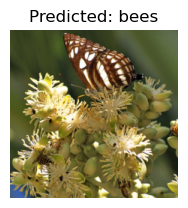

In [9]:
visualize_model_predictions(
    model_conv,
    img_path='hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

# Question 3(b)

In [24]:
#references for this block of code:https://chat.openai.com/share/a4e283fa-e043-4793-9012-9d20ae887bbb and https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np

def get_resnet18_features(dataset):
    # Load ResNet-18 model pretrained on ImageNet
    resnet18 = models.resnet18(pretrained=True)
    
    # Remove the final fully connected layer
    resnet18 = torch.nn.Sequential(*list(resnet18.children())[:-1])
    
    # Set the model to evaluation mode
    resnet18.eval()
    
    features_list = []  # List to store features for all images
    
    # Iterate over the dataset
    for image_data, _ in dataset:
        # Extract the image data from the tuple
        image = image_data
        
        # Preprocess the image
        image = image.unsqueeze(0)  # Add batch dimension
        
        # Extract features
        with torch.no_grad():
            features = resnet18(image)
        
        # Reshape the features and append to the list
        features_list.append(features.squeeze().numpy())
    
    # Convert the list of features to a numpy array
    features_array = np.array(features_list)
    
    return features_array.reshape(features_array.shape[0], -1)

# Assuming `image_datasets['train']` is your training dataset
train_features = get_resnet18_features(image_datasets['train'])
print("Shape of training features:", train_features.shape)


Shape of training features: (244, 512)


# Question 3(c)

In [26]:
#references for this block of code:https://chat.openai.com/share/a4e283fa-e043-4793-9012-9d20ae887bbb and https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have already defined get_resnet18_features function

# Extract ResNet-18 features for training data
train_features = get_resnet18_features(image_datasets['train'])

# Extract ResNet-18 features for test data
test_features = get_resnet18_features(image_datasets['val'])

# Get the labels for training data
train_labels = [label for _, label in image_datasets['train']]

# Get the labels for test data
test_labels = [label for _, label in image_datasets['val']]

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'n_estimators': [50, 100, 150, 200]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the final model with the best parameters
best_rf = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'], random_state=42)
best_rf.fit(X_train, y_train)

# Predict on validation set
val_preds = best_rf.predict(X_val)

# Evaluate on validation set
val_accuracy = accuracy_score(y_val, val_preds)
val_f1_score = f1_score(y_val, val_preds, average='weighted')

print("Validation Accuracy:", val_accuracy)
print("Validation F1 Score:", val_f1_score)

# Predict on test set
test_preds = best_rf.predict(test_features)

# Evaluate on test set
test_accuracy = accuracy_score(test_labels, test_preds)
test_f1_score = f1_score(test_labels, test_preds, average='weighted')

print("\nTest Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)


C:\Users\mrudal\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mrudal\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation Accuracy: 0.8979591836734694
Validation F1 Score: 0.8969112677163291

Test Accuracy: 0.9477124183006536
Test F1 Score: 0.9477124183006536


In [27]:
#references for this block of code:https://chat.openai.com/share/a4e283fa-e043-4793-9012-9d20ae887bbb and https://stackoverflow.com/questions/55083642/extract-features-from-last-hidden-layer-pytorch-resnet18
import torch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have already defined get_resnet18_features function

# Extract ResNet-18 features for training data
train_features = get_resnet18_features(image_datasets['train'])

# Extract ResNet-18 features for test data
test_features = get_resnet18_features(image_datasets['val'])

# Get the labels for training data
train_labels = [label for _, label in image_datasets['train']]

# Get the labels for test data
test_labels = [label for _, label in image_datasets['val']]

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize the SVC
svc = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the final model with the best parameters
best_svc = SVC(C=best_params['C'], gamma=best_params['gamma'])
best_svc.fit(X_train, y_train)

# Predict on validation set
val_preds = best_svc.predict(X_val)

# Evaluate on validation set
val_accuracy = accuracy_score(y_val, val_preds)
val_f1_score = f1_score(y_val, val_preds, average='weighted')

print("Validation Accuracy:", val_accuracy)
print("Validation F1 Score:", val_f1_score)

# Predict on test set
test_preds = best_svc.predict(test_features)

# Evaluate on test set
test_accuracy = accuracy_score(test_labels, test_preds)
test_f1_score = f1_score(test_labels, test_preds, average='weighted')

print("\nTest Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)


C:\Users\mrudal\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mrudal\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Validation Accuracy: 0.8775510204081632
Validation F1 Score: 0.8778581666780424

Test Accuracy: 0.954248366013072
Test F1 Score: 0.954271964534793


# Question 4
Deploy one model from part 1 on a local webserver with a web frontend (e.g. using streamlit). Add some GUI
elements, such as sliders for acidity, citrus etc. [2] Most of this should be in the video demo

Random forest classifier for red wine data set is deployed . The file A2_21d070044_q4.py contains the streamlit code to used to deploy with web frontend

In [54]:
#https://www.youtube.com/watch?v=WLwjvWq0GWA&t=1935s
import pickle
filename='trained_model.sav'
pickle.dump(rf_classifier_red ,open(filename,'wb'))